In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Dense
from glob import glob
from keras.layers.advanced_activations import ReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

# Loading the Directories

In [3]:
test_dir = "C://Users//parva//Downloads//archive//fruits-360//Test"
train_dir =  "C://Users//parva//Downloads//archive//fruits-360//Training"

In [4]:
train = ImageDataGenerator().flow_from_directory(train_dir, target_size = (100,100))
test = ImageDataGenerator().flow_from_directory(test_dir, target_size = (100,100))

Found 6404 images belonging to 13 classes.
Found 2134 images belonging to 13 classes.


# Model

In [5]:
model = Sequential()

In [6]:
num_classes = 13

In [7]:
model.add(Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False, input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), activation = 'relu', padding='same', use_bias=False))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      864       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18432     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)            

In [8]:
model.compile(optimizer = 'rmsprop',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])


In [9]:
batch_size = 32

In [28]:
model.fit(train,
         steps_per_epoch = 6404//batch_size,
         epochs = 5,
         validation_data = test,
         validation_steps = 2134//batch_size)

Epoch 1/5
200/200 [==============================] - 48s 240ms/step - loss: 0.1845 - accuracy: 0.9670 - val_loss: 0.0022 - val_accuracy: 0.9882
Epoch 2/5
200/200 [==============================] - 49s 243ms/step - loss: 0.1131 - accuracy: 0.9805 - val_loss: 0.4148 - val_accuracy: 0.8987
Epoch 3/5
200/200 [==============================] - 48s 242ms/step - loss: 0.1403 - accuracy: 0.9791 - val_loss: 0.0063 - val_accuracy: 0.9629
Epoch 4/5
200/200 [==============================] - 47s 237ms/step - loss: 0.1079 - accuracy: 0.9837 - val_loss: 1.8578 - val_accuracy: 0.9125
Epoch 5/5
200/200 [==============================] - 48s 241ms/step - loss: 0.1756 - accuracy: 0.9840 - val_loss: 0.2694 - val_accuracy: 0.9729


## Model Evaluation

In [31]:
model.evaluate(test)

67/67 [==============================] - 4s 53ms/step


[1.517207834922374e-07, 0.9732896089553833]

## Working with the model

In [32]:
classes = list(train.class_indices)

In [33]:
classes

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2']

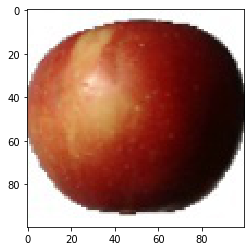

In [34]:
x = plt.imread("C:/Users/parva/Downloads/archive/fruits-360/Test/Apple Braeburn/3_100.jpg")
plt.imshow(x)

In [35]:
x = x/255
x = np.resize(x,(131,100,100,3))
x.shape
print(classes[np.argmax(model.predict(x))])

Apple Braeburn


In [36]:
pred_album = pd.DataFrame(columns = ["item_id","prediction"])
for item in os.listdir("C:/Users/parva/Downloads/archive/fruits-360/test-multiple_fruits"):
    x = plt.imread("C:/Users/parva/Downloads/archive/fruits-360/test-multiple_fruits" + "/" + item)
    x = np.resize(x,(131,100,100,3))
    pred_album = pred_album.append({"item_id":item,"prediction":classes[np.argmax(model.predict(x)[0])]},ignore_index = True)
pred_album.to_csv("predictions.csv")


In [38]:
pd.read_csv("predictions.csv")

,Unnamed: 0,item_id,prediction
0,0,apple.jpg,Apple Red Yellow 2
1,1,apples1.jpg,Apple Pink Lady
2,2,apples2.jpg,Apple Red Yellow 2
3,3,apples3.jpg,Apple Red Yellow 1
4,4,apples4.jpg,Apple Red Delicious
5,5,apples_peaches1.jpg,Apple Red Yellow 2
6,6,apples_peaches2.jpg,Apple Red Yellow 2
7,7,apples_pears.jpg,Apple Red Yellow 2
8,8,apple_apricot_nectarine_peach_peach(flat)_pome...,Apple Golden 2
9,9,apple_apricot_peach_peach(flat)_pomegranate_pe...,Apple Golden 2
